In [1]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd
import sys
%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [2]:
# Setup the figures
execfile('../code/figure-setup.py')

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [16]:
# Upload the results of the 70 micron AGN contribution
agn_frac_pacs = pd.read_csv(casey_dir+'beta_fixed_2_wturn_gaussianPrior/PACS_AGN_contribution.csv', index_col=0)
agn_frac_pacs[agn_frac_pacs['agn_frac_70'] < 0] = 0
# Upload the fitting results for the C12 model
bat_c12 = pd.read_csv('../data/bat-agn-c12-params.csv', index_col=0)

# Remove 'bad' sources
radio_loud_sources = np.array(['PICTORA', '3C111.0', '3C120',
                              '2MASXJ23272195+1524375', 'PKS2331-240',
                              'HB890241+622', 'Mrk3'])
bat_c12 = bat_c12.drop(radio_loud_sources)
agn_frac_pacs = agn_frac_pacs.drop(radio_loud_sources[:-1])

#bat_c12.loc['UGC06728', 'lir_sf'] += 2.0
#bat_c12.loc['UGC06728', 'mdust'] += 2.0

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

bat_flux = pd.read_csv(data_dir+'bat_bat_flux.csv', index_col=0)
bat_flux['bat_flux_err_low'] = bat_flux['BAT_flux'] - bat_flux['BAT_flux_90_low']
bat_flux['bat_flux_err_high'] = bat_flux['BAT_flux_90_high'] - bat_flux['BAT_flux']
bat_flux['lbat'] = np.log10(4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux']*10**(-12))
bat_flux['bat_err'] = np.max(np.vstack([bat_flux['bat_flux_err_low'], bat_flux['bat_flux_err_high']]), axis=0)
bat_flux['lbat_err'] = 0.434*4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['bat_err']*10**(-12)/(10**bat_flux['lbat'])
bat_flux['lbat_flag'] = pd.Series(index=bat_flux.index)
bat_flux.loc[bat_flux['BAT_flux_90_high'] == 0, 'lbat_flag'] = 0
bat_flux.loc[bat_flux['BAT_flux_90_low'] != 0, 'lbat_flag'] = 1
bat_flux.loc[bat_flux['lbat_flag'] == 0, 'lbat_err'] = 0

agn_frac_pacs['lbat'] = bat_flux['lbat']
agn_frac_pacs['lsf'] = bat_c12['lir_sf']
agn_frac_pacs['lagn'] = bat_c12['lir_agn']

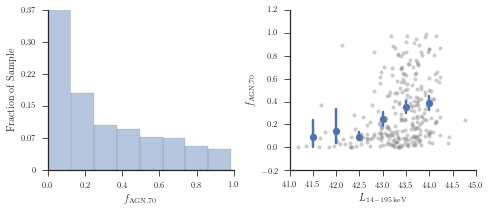

In [21]:
fig = plt.figure(figsize=(1.1*textwidth, 1.1*3./8.*textwidth))

ax1 = fig.add_subplot(121)
sn.distplot(agn_frac_pacs[r'agn_frac_70'], kde=False)
#ax1.set_xlim(0,1)
ax1.set_xlabel(r'$f_{\rm AGN,70}$')
ax1.set_ylabel('Fraction of Sample')
ax1.yaxis.set_ticklabels(['0', '0.07', '0.15', '0.22', '0.30', '0.37'])

ax2 = fig.add_subplot(122)
ax2.plot(agn_frac_pacs['lbat'], agn_frac_pacs[r'agn_frac_70'], color='grey', ms=4, alpha=0.4, ls='None', marker='o')
sn.regplot(agn_frac_pacs['lbat'], agn_frac_pacs[r'agn_frac_70'], x_bins=np.arange(41.5, 44.5, 0.5), fit_reg=False)
ax2.set_xlabel(r'$L_{\rm 14-195\,keV}$')
ax2.set_ylabel(r'$f_{\rm AGN,70}$')
sn.despine()
fig.subplots_adjust(wspace=0.3)

fig.savefig(figsave_dir+'pacs_AGN_contribution.pdf', bbox_inches='tight')

In [24]:
sum(agn_frac_pacs['agn_frac_70'] > 0.5)

65

In [25]:
sum(agn_frac_pacs['agn_frac_70'] < 0.2)

132

In [20]:
np.array([20., 40., 60., 80., 100.])/len(agn_frac_pacs)

array([ 0.07380074,  0.14760148,  0.22140221,  0.29520295,  0.36900369])

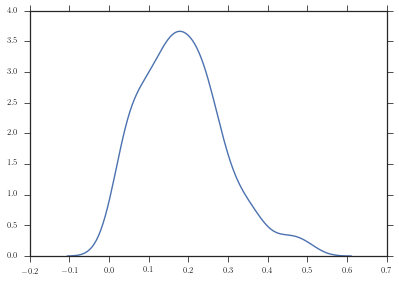

In [26]:
sn.kdeplot(agn_frac_pacs['agn_frac_70_84'] - agn_frac_pacs['agn_frac_70'])

In [27]:
(agn_frac_pacs['agn_frac_70_84'] - agn_frac_pacs['agn_frac_70']).median()

0.1762529190998

In [28]:
(agn_frac_pacs['agn_frac_70'] - agn_frac_pacs['agn_frac_70_16']).median()

0.13770861357533

In [29]:
agn_frac_pacs['agn_frac_160'].sort_values()

Name
MCG-05-23-016            -0.000006
ESO103-035               -0.000005
Mrk841                   -0.000003
MCG-03-34-064            -0.000003
Mrk477                   -0.000003
MCG-06-30-015            -0.000003
NGC3516                  -0.000003
VIIZw073                 -0.000002
Mrk509                   -0.000002
IRAS05218-1212           -0.000002
NGC6552                  -0.000002
LEDA38038                -0.000002
Fairall9                 -0.000002
IRAS03219+4031           -0.000002
NGC3281                  -0.000002
Mrk1210                  -0.000002
WKK1263                  -0.000002
NGC235A                  -0.000002
2MASXJ03305218+0538253   -0.000002
2MASXJ19373299-0613046   -0.000002
NGC1125                  -0.000002
NGC4102                  -0.000002
IC1816                   -0.000002
ESO362-18                -0.000002
IISZ010                  -0.000002
UGC07064                 -0.000002
IC2637                   -0.000001
CGCG319-007              -0.000001
ESO509-IG066NED